In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
income_data = pd.read_csv('C:/Users/karan/Desktop/Projects/Datas/income.data.csv')

In [ ]:
income_data.head()

,Unnamed: 0,income,happiness
0,1,3.862647,2.314489
1,2,4.979381,3.433490
2,3,4.923957,4.599373
3,4,3.214372,2.791114
4,5,7.196409,5.596398


In [ ]:
income_data.tail()

,Unnamed: 0,income,happiness
493,494,5.249209,4.568705
494,495,3.471799,2.535002
495,496,6.087610,4.397451
496,497,3.440847,2.070664
497,498,4.530545,3.710193


In [ ]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  498 non-null    int64  
 1   income      498 non-null    float64
 2   happiness   498 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [ ]:
income_data.drop(columns = ['Unnamed: 0'], inplace = True)

In [ ]:
cols = income_data.columns

income


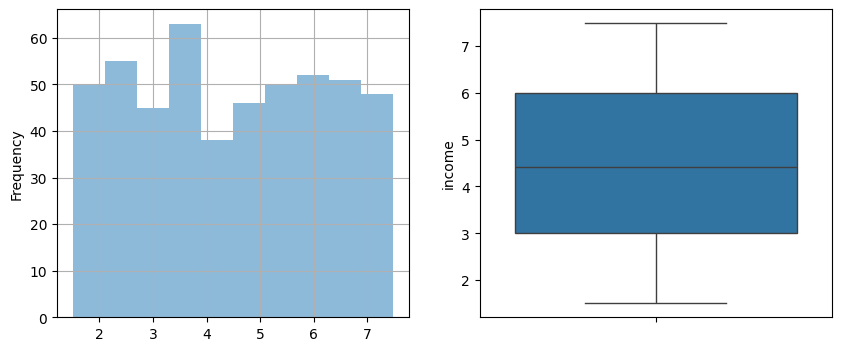

happiness


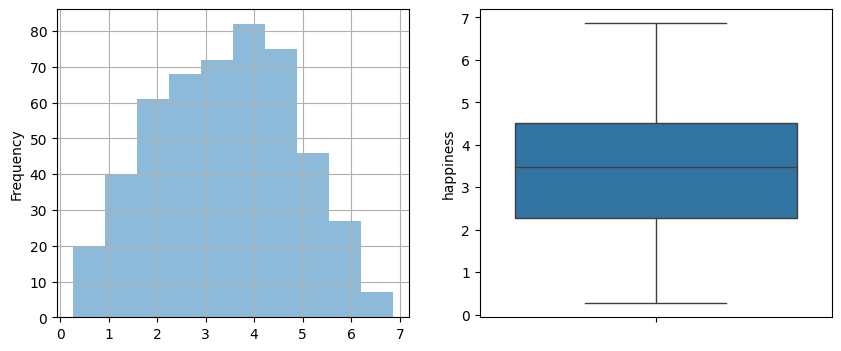

In [ ]:
for col in cols:
    print(col)
    plt.figure(figsize = (10,4))
    plt.subplot(1,2,1)
    income_data[col].hist(bins = 10, alpha = 0.5)
    plt.ylabel('Frequency')
    
    plt.subplot(1,2,2)
    sns.boxplot(y = income_data[col])
    plt.show()


In [ ]:
x = income_data['income']
y = income_data['happiness']

In [ ]:
X = sm.add_constant(x)
model = sm.OLS(y,x).fit()

In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              happiness   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.962
Method:                 Least Squares   F-statistic:                          1.249e+04
Date:                Wed, 03 Jul 2024   Prob (F-statistic):                        0.00
Time:                        09:41:41   Log-Likelihood:                         -543.36
No. Observations:                 498   AIC:                                      1089.
Df Residuals:                     497   BIC:                                      1093.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
y_pred = model.predict(x)

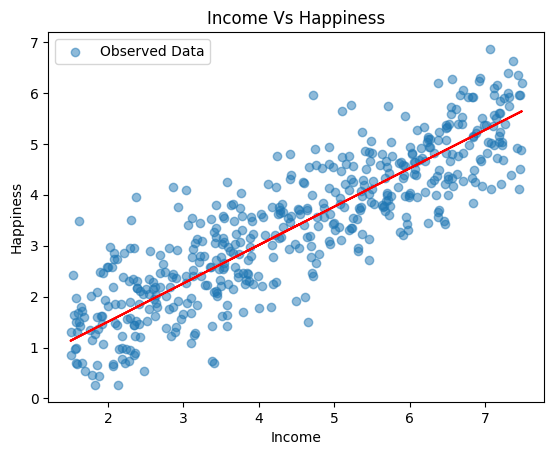

In [ ]:
plt.scatter(income_data['income'], income_data['happiness'], alpha = 0.5, label = 'Observed Data')
plt.plot(income_data['income'], y_pred, color = 'red')
plt.xlabel('Income')
plt.ylabel('Happiness')
plt.title('Income Vs Happiness')
plt.legend()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = LR_model.predict(X_test)

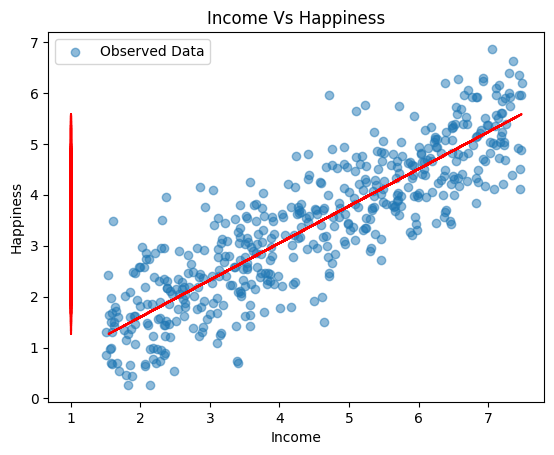

In [ ]:
plt.scatter(income_data['income'], income_data['happiness'], alpha = 0.5, label = 'Observed Data')
plt.plot(X_test, y_pred, color = 'red')
plt.xlabel('Income')
plt.ylabel('Happiness')
plt.title('Income Vs Happiness')
plt.legend()

In [ ]:
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print("Mean Squared Error: {MSE}", MSE)
print("Mean Absolute Error: {MAE}", MAE)
print("R2 Error: {R2}", R2)


Mean Squared Error: {MSE} 0.5516785127395876
Mean Absolute Error: {MAE} 0.5938500809042586
R2 Error: {R2} 0.7034319160859526
